<a href="https://colab.research.google.com/github/JCCamelo/MVP2_PUC_RIO/blob/main/MVP2_Machine_Learning_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Introdução

League of Legends é um dos jogos onlines mais famosos e jogados de todos os tempos, tendo millhões de jogadores conectados diariamente pelo mundo inteiro. Cada partida consiste de 5 jogadores jogarem contra outros 5 com o objetivo de destruírem a estrutura central do time oponente, que fica no território que cada um proteje, para ganhar. Neste objetivo, diversas informações são geradas, várias ações que os players precisam tomar, como por exemplo, cada soldado que derrotam, cada torre que derrubam, quanto de ouro estão ganhando e etc. No fim do jogo, cada pessoa ganha ou perde uma quantidade de pontos, que somados fazem-os subir ou cair de "elo", todos buscam a maior de todas, a última a ser conquistada, o tão sonhado Challenger.

O dataset escolhido para o estudo nos informa vários dados das ações que os jogadores tomam dentro da partida para tentar ganhá-la. São informações dos primeiros 10 minutos de uma partida de um servidor do jogo com somente players que estão no último elo, o Challenger. Vamos estudá-lo para entender o que os jogadores precisam fazer nos primeiros 10 minutos para que tenham uma alta probabilidade de ganhá-la.

As variáveis são:

1. gameId - A identificação do jogador
2. blueWins - Nossa variável target, 1 se o time azul vencer, 0 se perder
3. blueTotalGolds - Número total de ouro
4. blueCurrentGolds - O ouro que a equipe contém sem ter gasto em itens na partida
5. blueTotalLevel - Total de nível que o time tem somando os 5 jogadores
6. blueAvgLevel - a média dos níveis de cada jogador
7. blueTotalMinionKills - Número de soldados derrotados pelos jogadores
8. blueTotalJungleMinionKills -Número de monstros da selva derrotados
9. blueFirstBlood - Mostra se o time conseguiu a primeira eliminação na partida
10. blueKill - Quantas vezes os jogadores eliminaram os da outra equipe
11. blueDeath - Quantas vezes os jogadores foram eliminados pelos da outra equipe
12. blueAssist - Quantas assistencias os jogadores tiveram
13. blueWardPlaced - Quantas sentinelas foram posicionadas
14. blueWardKills - Quantas sentinelas do outro time foram eliminadas
15. blueFirstTower - Mostra se o time conseguiu a primeira torre na partida
16. blueFirstInhibitor - Mostra se o time conseguiu o primeiro inibidor na partida
17. blueFirstTowerLane - Mostra se o time destruiu a primeira torre, aonde ela foi destruída
18. blueTowerKills - Quantas torres foram destruídas pelo time
19. blueMidTowerKills - Quantas torres foram destruídas pelo time na rota do meio
20. blueTopTowerKills - Quantas torres foram destruídas pelo time na rota do topo
21. blueBotTowerKills - Quantas torres foram destruídas pelo time na rota de baixo
22. blueInhibitor - Quantos inibidores foram destruídos pelo time
23. blueFirstDragon - Mostra se o time conseguiu derrotar o primeiro dragão na partida
24. blueDragnoType - Mostra se o time derrotou o primeiro dragão, qual era o elemento dele
25. blueDragon - Qualtos dragões foram derrotados pelo time
26. blueRiftHeralds - Quantos arautos foram derrotados pelo time

Em toda partida, 2 equipes se enfrentam, sendo que uma joga no lado azul, que consiste em ir de baixo para cima, em direção a base oponente que fica no lado vermelho, que precisa fazer o movimento inverso, ir de cima para baixo. Usaremos somente as informações das colunas que nos diz respeito aos dados da equipe azul, deixaremos a equipe vermelha de fora, pois com os dados de uma já sabemos que a outra irá vencer ou perder, uma vez que o jogo não tem empate, quem destruir a base principal da equipe adversária primeiro, ganha.


# 2 - Importação das Bibliotecas

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

# 3 - Carga do Dataset

In [3]:
url = "https://raw.githubusercontent.com/JCCamelo/MVP2_Machine_Learning/main/Challenger_Ranked_Games_10minute.csv"

dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,4247263043,0,14870,2889,32,6.4,199,53,0,3,...,[],0,0,0,0,0,1,['WATER_DRAGON'],1,0
1,4247155821,1,14497,2617,33,6.6,229,44,0,2,...,[],0,0,0,0,0,0,[],0,0
2,4243963257,0,15617,1757,34,6.8,223,39,0,3,...,['BOT_LANE'],1,0,0,1,0,1,['FIRE_DRAGON'],1,1
3,4241678498,0,15684,1439,35,7.0,251,64,0,3,...,[],0,0,0,0,0,0,[],0,0
4,4241538868,1,17472,3512,35,7.0,257,46,0,7,...,[],0,0,0,0,0,0,[],0,0


In [4]:
# Mostra as dimensões do dataset
print(dataset.shape)

(26409, 51)


In [5]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26409 entries, 0 to 26408
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gameId                      26409 non-null  int64  
 1   blueWins                    26409 non-null  int64  
 2   blueTotalGolds              26409 non-null  int64  
 3   blueCurrentGolds            26409 non-null  int64  
 4   blueTotalLevel              26409 non-null  int64  
 5   blueAvgLevel                26409 non-null  float64
 6   blueTotalMinionKills        26409 non-null  int64  
 7   blueTotalJungleMinionKills  26409 non-null  int64  
 8   blueFirstBlood              26409 non-null  int64  
 9   blueKill                    26409 non-null  int64  
 10  blueDeath                   26409 non-null  int64  
 11  blueAssist                  26409 non-null  int64  
 12  blueWardPlaced              26409 non-null  int64  
 13  blueWardKills               264

In [6]:
# Mostra as 5 últimas linhas do dataset
dataset.tail(5)

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
26404,4143231833,0,16762,5072,36,7.2,206,52,0,7,...,[],0,0,0,0,0,1,['WATER_DRAGON'],1,1
26405,4157911901,0,35765,1440,39,7.8,191,16,0,18,...,[],3,1,0,2,0,0,[],0,0
26406,3764171638,0,15712,4137,34,6.8,218,55,0,3,...,[],0,0,0,0,0,0,[],0,0
26407,4110201724,1,15850,3220,33,6.6,193,48,0,6,...,[],0,0,0,0,0,0,[],0,0
26408,4100240254,1,16103,3128,34,6.8,255,44,0,3,...,[],0,0,0,0,0,1,['WATER_DRAGON'],1,0


Percebemos que neste código a coluna 'blueFirstBlood' tem todos os dados 0, isto é um erro pois os dados nos informa que dos 26.409 jogos que estamos analisando, nenhum deles a equipe do time azul teve a primeira eliminação da partida. Dessa forma esta coluna será descartada, junta com todas as outras que mostram a primeira estatística em algum dos atributos, pois não conseguimos dizer a veracidade das informações.

In [7]:
# seleciona a coluna 'blueFirstBlood'
coluna_blueFirstBlood = dataset['blueFirstBlood']

# conta a quantidade de ocorrências de cada categoria
categorias_blueFirstBlood = coluna_blueFirstBlood.value_counts()

# exibe as categorias encontradas
print(categorias_blueFirstBlood)

0    26409
Name: blueFirstBlood, dtype: int64


# 4 - Feature selection


Começaremos essa etapa excluindo as colunas que não são interessantes para o estudo, como dito anteriormente, descartaremos as que informam a primeira estatística em algum dos atributos, por exemplo, qual equipe derrubou uma torre primeiro ou derrotou primeiro o dragão, pois não conseguimos afirmar se esses dados estão corretos, pois uma dessas está com dados zerados.

Descartaremos também a coluna 'gameId' pois nos informa a identificação de cada jogador, essa informação não é relevante para o estudo em Machine Learning.

In [8]:
dataset = dataset.drop(['gameId'], axis = 1)
dataset = dataset.drop(['blueAvgLevel'], axis = 1) # Essa coluna sempre estará relacionada com a blueTotalLevel, pois a média sempre será dividia por 5, porque sempre serão 5 jogadores
dataset = dataset.drop(['blueFirstBlood'], axis = 1)
dataset = dataset.drop(['blueFirstTower'], axis = 1)
dataset = dataset.drop(['blueFirstInhibitor'], axis = 1)
dataset = dataset.drop(['blueFirstTowerLane'], axis = 1)
dataset = dataset.drop(['blueFirstDragon'], axis = 1)
dataset = dataset.drop(['blueDragnoType'], axis = 1)

dataset.head()

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueKill,blueDeath,blueAssist,blueWardPlaced,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,0,14870,2889,32,199,53,3,9,7,19,...,[],0,0,0,0,0,1,['WATER_DRAGON'],1,0
1,1,14497,2617,33,229,44,2,3,2,17,...,[],0,0,0,0,0,0,[],0,0
2,0,15617,1757,34,223,39,3,11,4,15,...,['BOT_LANE'],1,0,0,1,0,1,['FIRE_DRAGON'],1,1
3,0,15684,1439,35,251,64,3,4,2,62,...,[],0,0,0,0,0,0,[],0,0
4,1,17472,3512,35,257,46,7,5,6,17,...,[],0,0,0,0,0,0,[],0,0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26409 entries, 0 to 26408
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   blueWins                    26409 non-null  int64  
 1   blueTotalGolds              26409 non-null  int64  
 2   blueCurrentGolds            26409 non-null  int64  
 3   blueTotalLevel              26409 non-null  int64  
 4   blueTotalMinionKills        26409 non-null  int64  
 5   blueTotalJungleMinionKills  26409 non-null  int64  
 6   blueKill                    26409 non-null  int64  
 7   blueDeath                   26409 non-null  int64  
 8   blueAssist                  26409 non-null  int64  
 9   blueWardPlaced              26409 non-null  int64  
 10  blueWardKills               26409 non-null  int64  
 11  blueTowerKills              26409 non-null  int64  
 12  blueMidTowerKills           26409 non-null  int64  
 13  blueTopTowerKills           264

Neste código excluímos todas as colunas que fazem referência a equipe que está jogando no lado vermelho, ou seja, a adversária da que está jogando no campo azul. Fazemos isso pois, com os resultados da equipe azul, saberemos se a equipe vermelha irá perder ou ganhar, devido ao jogo não apresentar empate, algum time sairá vencedor.

In [10]:
dataset = dataset.drop(dataset.columns[18:43], axis=1)

dataset.head()

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueKill,blueDeath,blueAssist,blueWardPlaced,blueWardKills,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueDragon,blueRiftHeralds
0,0,14870,2889,32,199,53,3,9,7,19,2,0,0,0,0,0,0,0
1,1,14497,2617,33,229,44,2,3,2,17,1,0,0,0,0,0,0,1
2,0,15617,1757,34,223,39,3,11,4,15,6,0,0,0,0,0,0,0
3,0,15684,1439,35,251,64,3,4,2,62,4,0,0,0,0,0,0,0
4,1,17472,3512,35,257,46,7,5,6,17,6,0,0,0,0,0,0,1


Em seguida, colocamos nossa coluna target, 'blueWins' para o final da tabela para facilitar nosso código.

In [11]:
# Armazene a coluna "blueWins" em uma variável
coluna_blueWins = dataset['blueWins']

# Remova a coluna "blueWins" do DataFrame
dataset = dataset.drop('blueWins', axis=1)

# Adicione a coluna "blueWins" novamente como a última coluna
dataset['blueWins'] = coluna_blueWins

dataset.head()

,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueKill,blueDeath,blueAssist,blueWardPlaced,blueWardKills,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueDragon,blueRiftHeralds,blueWins
0,14870,2889,32,199,53,3,9,7,19,2,0,0,0,0,0,0,0,0
1,14497,2617,33,229,44,2,3,2,17,1,0,0,0,0,0,0,1,1
2,15617,1757,34,223,39,3,11,4,15,6,0,0,0,0,0,0,0,0
3,15684,1439,35,251,64,3,4,2,62,4,0,0,0,0,0,0,0,0
4,17472,3512,35,257,46,7,5,6,17,6,0,0,0,0,0,0,1,1


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26409 entries, 0 to 26408
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   blueTotalGolds              26409 non-null  int64
 1   blueCurrentGolds            26409 non-null  int64
 2   blueTotalLevel              26409 non-null  int64
 3   blueTotalMinionKills        26409 non-null  int64
 4   blueTotalJungleMinionKills  26409 non-null  int64
 5   blueKill                    26409 non-null  int64
 6   blueDeath                   26409 non-null  int64
 7   blueAssist                  26409 non-null  int64
 8   blueWardPlaced              26409 non-null  int64
 9   blueWardKills               26409 non-null  int64
 10  blueTowerKills              26409 non-null  int64
 11  blueMidTowerKills           26409 non-null  int64
 12  blueTopTowerKills           26409 non-null  int64
 13  blueBotTowerKills           26409 non-null  int64
 14  blueIn

Nesta etapa usaremos o algoritmo SelectKBest para selecionar os 10 melhores atributos para o estudo, pois queremos reduzir o número de variáveis para nosso modelo performar melhor, tendo uma maior acurácia e evitar problemas de underfitting e overfitting.

In [13]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:17] # atributos
y = array[:,17] # classe (target)

In [14]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=10)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:17])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:17]))


Número original de atributos: 17

Número reduzido de atributos: 10

Atributos Originais: Index(['blueTotalGolds', 'blueCurrentGolds', 'blueTotalLevel',
       'blueTotalMinionKills', 'blueTotalJungleMinionKills', 'blueKill',
       'blueDeath', 'blueAssist', 'blueWardPlaced', 'blueWardKills',
       'blueTowerKills', 'blueMidTowerKills', 'blueTopTowerKills',
       'blueBotTowerKills', 'blueInhibitor', 'blueDragon', 'blueRiftHeralds'],
      dtype='object')

Scores dos Atributos Originais: [ 531.138  645.171  432.231  521.062  133.242 1239.559 1041.757  494.733
   12.625   80.208  345.277  215.226   96.67   152.571  100.325 1137.463
  286.291]

Atributos Selecionados: ['blueTotalGolds' 'blueCurrentGolds' 'blueTotalLevel'
 'blueTotalMinionKills' 'blueKill' 'blueDeath' 'blueAssist'
 'blueTowerKills' 'blueDragon' 'blueRiftHeralds']


Selecionamos então 10 atributos, que são eles:

['blueTotalGolds' 'blueCurrentGolds' 'blueTotalLevel'
 'blueTotalMinionKills' 'blueKill' 'blueDeath' 'blueAssist'
 'blueTowerKills' 'blueDragon' 'blueRiftHeralds']

 Os 7 restantes serão descartados conforme o código abaixo, restando 9 atributos e nossa variável target.

In [15]:
dataset = dataset.drop(['blueTotalJungleMinionKills'], axis = 1)
dataset = dataset.drop(['blueWardPlaced'], axis = 1)
dataset = dataset.drop(['blueWardKills'], axis = 1)
dataset = dataset.drop(['blueMidTowerKills'], axis = 1)
dataset = dataset.drop(['blueTopTowerKills'], axis = 1)
dataset = dataset.drop(['blueBotTowerKills'], axis = 1)
dataset = dataset.drop(['blueInhibitor'], axis = 1)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26409 entries, 0 to 26408
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   blueTotalGolds        26409 non-null  int64
 1   blueCurrentGolds      26409 non-null  int64
 2   blueTotalLevel        26409 non-null  int64
 3   blueTotalMinionKills  26409 non-null  int64
 4   blueKill              26409 non-null  int64
 5   blueDeath             26409 non-null  int64
 6   blueAssist            26409 non-null  int64
 7   blueTowerKills        26409 non-null  int64
 8   blueDragon            26409 non-null  int64
 9   blueRiftHeralds       26409 non-null  int64
 10  blueWins              26409 non-null  int64
dtypes: int64(11)
memory usage: 2.2 MB


In [16]:
dataset.head()

,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueTotalMinionKills,blueKill,blueDeath,blueAssist,blueTowerKills,blueDragon,blueRiftHeralds,blueWins
0,14870,2889,32,199,3,9,7,0,0,0,0
1,14497,2617,33,229,2,3,2,0,0,1,1
2,15617,1757,34,223,3,11,4,0,0,0,0
3,15684,1439,35,251,3,4,2,0,0,0,0
4,17472,3512,35,257,7,5,6,0,0,1,1


# 5 - Conjuntos de treino e teste

Para começar a etapa de treino e teste, separamos o dataset nas bases de treino e teste, com o método holdout:

In [17]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:9]
y = array[:,9]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# 6 - Treinamento dos modelos

Para começar a etapa de modelagem e inferência, utilizaremos a validação cruzada para treinar e avaliar os modelos usando a métrica acurácia com a configuração padrão de hiperparâmetros da scikit-Learn:

LR: 0.810763 (0.001004)
KNN: 0.778435 (0.006843)
CART: 0.718228 (0.006122)
NB: 0.388129 (0.006812)
SVM: 0.810053 (0.000203)
Bagging: 0.814455 (0.003582)
RF: 0.817768 (0.002790)
ET: 0.815543 (0.005167)
Ada: 0.821365 (0.003767)
GB: 0.821034 (0.003322)
Voting: 0.811000 (0.000736)


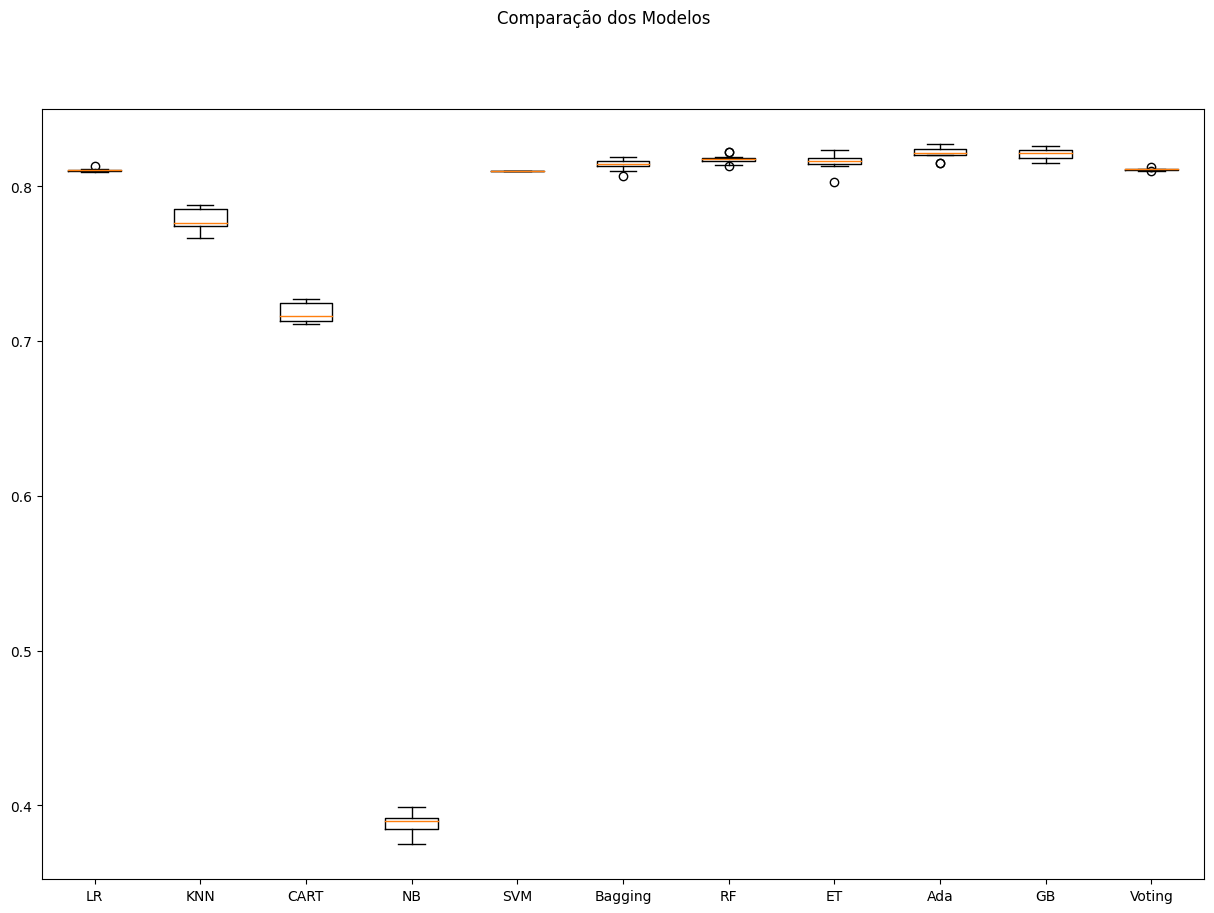

In [18]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Em busca de melhores resultados, repetiremos o processo, utilizando a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados, evitando vazamento de dados( data leakage) e comparar o seu resultado com os modelos treinados com o dataset original:

LR-orig: 0.811 (0.001)
KNN-orig: 0.778 (0.007)
CART-orig: 0.718 (0.006)
NB-orig: 0.388 (0.007)
SVM-orig: 0.810 (0.000)
Bag-orig: 0.814 (0.004)
RF-orig: 0.818 (0.003)
ET-orig: 0.816 (0.005)
Ada-orig: 0.821 (0.004)
GB-orig: 0.821 (0.003)
Vot-orig: 0.811 (0.001)
LR-padr: 0.813 (0.002)
KNN-padr: 0.793 (0.004)
CART-padr: 0.714 (0.005)
NB-padr: 0.389 (0.007)
SVM-padr: 0.822 (0.004)
Bag-padr: 0.814 (0.004)
RF-padr: 0.817 (0.004)
ET-padr: 0.815 (0.004)
Ada-padr: 0.821 (0.004)
GB-padr: 0.821 (0.003)
Vot-padr: 0.821 (0.002)
LR-norm: 0.812 (0.001)
KNN-norm: 0.792 (0.005)
CART-norm: 0.716 (0.008)
NB-norm: 0.389 (0.007)
SVM-norm: 0.821 (0.004)
Bag-norm: 0.815 (0.004)
RF-norm: 0.818 (0.003)
ET-norm: 0.816 (0.004)
Ada-norm: 0.821 (0.004)
GB-norm: 0.821 (0.003)
Vot-norm: 0.820 (0.002)


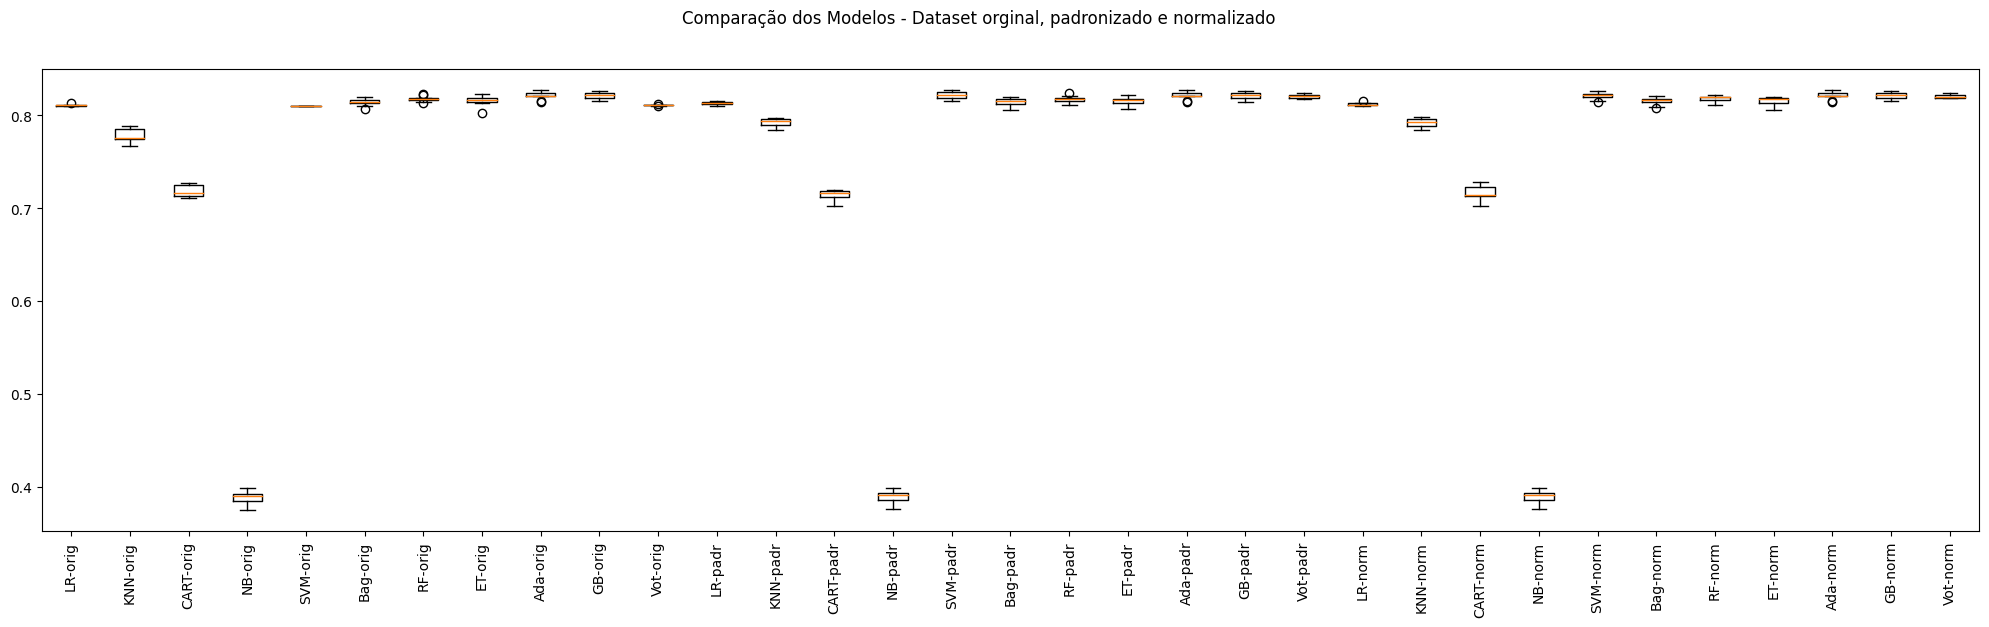

In [19]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

O modelo que melhor apresentou resultados foi o de SVM com dados padronizados, teve uma acurácia de 82% e um desvio padrão de 0,4%.

Finalizaremos esse modelo, treinando-o em todo o conjunto de dados de treinamento (sem validação cruzada), e faremos predições para o conjunto de dados de teste que foi separado logo no início da prática, a fim de confirmarmos os resultados. Primeiro, iremos realizar a padronização dos dados de entrada. Depois, treinaremos o modelo e exibiremos a acurácia de teste.

In [22]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = SVC()
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8173040514956456


O resultado foi um pouco pior que os 82% encontrado primeiramente, ficando com 81%, porém mostra que não ocorreu overfitting e ficamos com uma boa acurácia no modelo.

Por fim, treinaremos o modelo com todo o dataset, e não apenas o conjunto de treino, assim partiremos para a etapa de utilização.

In [23]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

SVC()

Agora podemos colocar dados de partidas para ver como o modelo se comporta. As informações abaixo são de uma partida de League of Legends que foi jogada recentemente, tendo a equipe azul como perdedora.

In [24]:
# Novos dados - pegos em uma partida que aconteceu de verdade recentemente, tendo
#               a equipe azul sendo derrotada
data = {'blueTotalGolds':  [14000],
        'blueCurrentGolds': [2500],
        'blueTotalLevel': [35],
        'blueTotalMinionKills': [216],
        'blueKill': [2],
        'blueDeath': [6],
        'blueAssist': [2],
        'blueTowerKills' : [0],
        'blueDragon' : [1],
        'blueRiftHeralds' : [0]
        }

atributos = ['blueTotalGolds', 'blueCurrentGolds', 'blueTotalLevel', 'blueTotalMinionKills',
             'blueKill', 'blueDeath', 'blueAssist','blueTowerKills', 'blueDragon',
             'blueRiftHeralds']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:9].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-0.762 -0.468 -0.224  0.057 -0.932 -0.271 -0.651 -0.26   1.487]]


In [25]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0]


No fim, o modelo conseguiu identificar e prever que, conforme os atributos que temos nos primeiros 10 minutos de partida, a equipe azul sairia derrotada.